<a href="https://colab.research.google.com/github/Valeria-YL/2047880MINERIA/blob/main/Practicas/Practica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")
df = pd.read_csv(os.path.join(path, "blood_donor_dataset.csv"))
df.head()

100%|██████████| 484k/484k [00:00<00:00, 882kB/s]

Extracting files...


,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17
1,a6a3f7fe55,Eugene Bowman,hramos@brown-sellers.com,b6Wq6Cqz@5,+61 450709944,Darwin,AB-,Yes,64,8,16,2016-11-11
2,cee6478144,Sheri Bolton DDS,jasmine85@hotmail.com,$9RB51m#s7,+61 428756361,Melbourne,AB+,Yes,39,6,6,2022-02-25
3,5986bc55f9,Kelly Boyd,pattylawrence@riley-hayes.com,@5Tdg(4kCm,+61 454318320,Darwin,A-,No,55,20,20,2025-04-04
4,93246afe6c,Taylor Guzman,martinezjacob@wilson.com,x!)9Ag@J*7,+61 484158472,Darwin,O-,No,7,35,35,2022-11-30


Preparamos nuestros datos eliminando las columnas no númericas.

In [2]:
non_numeric_cols = ['donor_id', 'name', 'email', 'password', 'contact_number', 'city', 'blood_group', 'availability', 'created_at']
numeric_df = df.drop(columns=non_numeric_cols)

 Creamos y analizamos la **Matriz de Correlación**


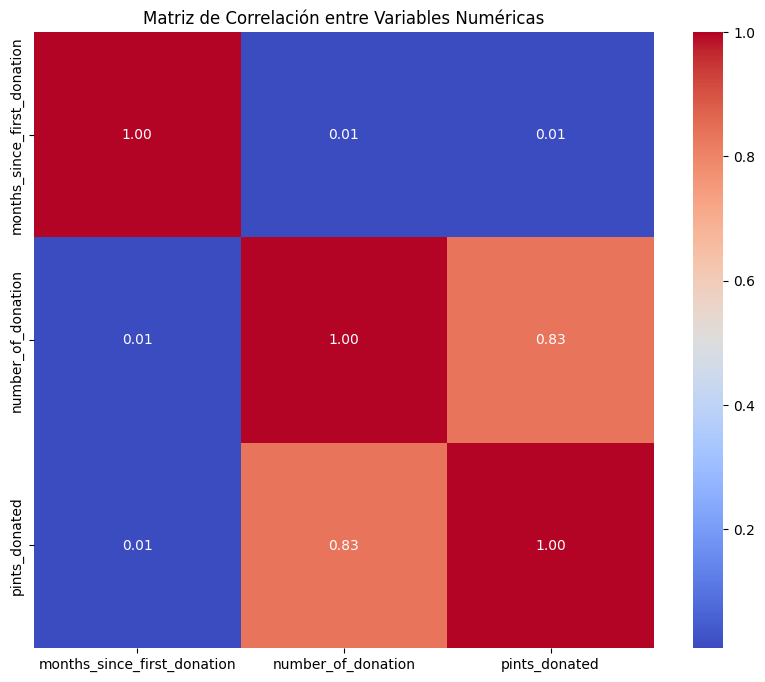

In [3]:
matriz = numeric_df.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

Preparamos los datos para el modelo lineal y dividmos los datos en un conjunto entrenamiento y de prueba.

In [4]:
X = df[['months_since_first_donation', 'pints_donated']]
y = df['number_of_donation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Lineal y su visualización.
Creamos un modelo de regresión lineal para predecir el numero de donaciones basados en los meses desde la primera donación y los medio litros de sangre donados.

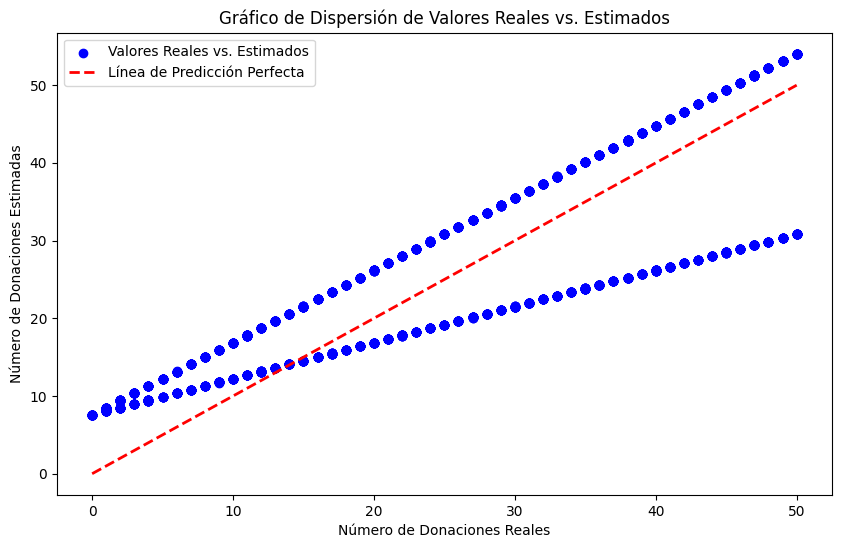

In [5]:
#Creamos y entrenamos el modelo Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

#Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Gráfico de valores estimados vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valores Reales vs. Estimados')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea de Predicción Perfecta')
plt.xlabel('Número de Donaciones Reales')
plt.ylabel('Número de Donaciones Estimadas')
plt.title('Gráfico de Dispersión de Valores Reales vs. Estimados')
plt.legend()
plt.show()

# R2 Score
Coeficiente de determinación, nos indica la proporción de la varianza en la variable dependiente que se puede predecir a partir de las variables independientes.

In [6]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')

print(f"Coeficientes del modelo: {model.coef_}")

R2 Score: 0.6716
Coeficientes del modelo: [-2.50213517e-04  4.64613435e-01]


El modelo de regresión lineal muestra una capacidad predictiva moderada (R² = 0.67). La variable pints_donated tiene un impacto significativo, mientras que months_since_first_donation no aporta valor predictivo.